#                                          Problem Statement
##                                        **Prediction of price of laptop**
- Based upon the input we need to predict the price of laptop. **(Regression Problem)**


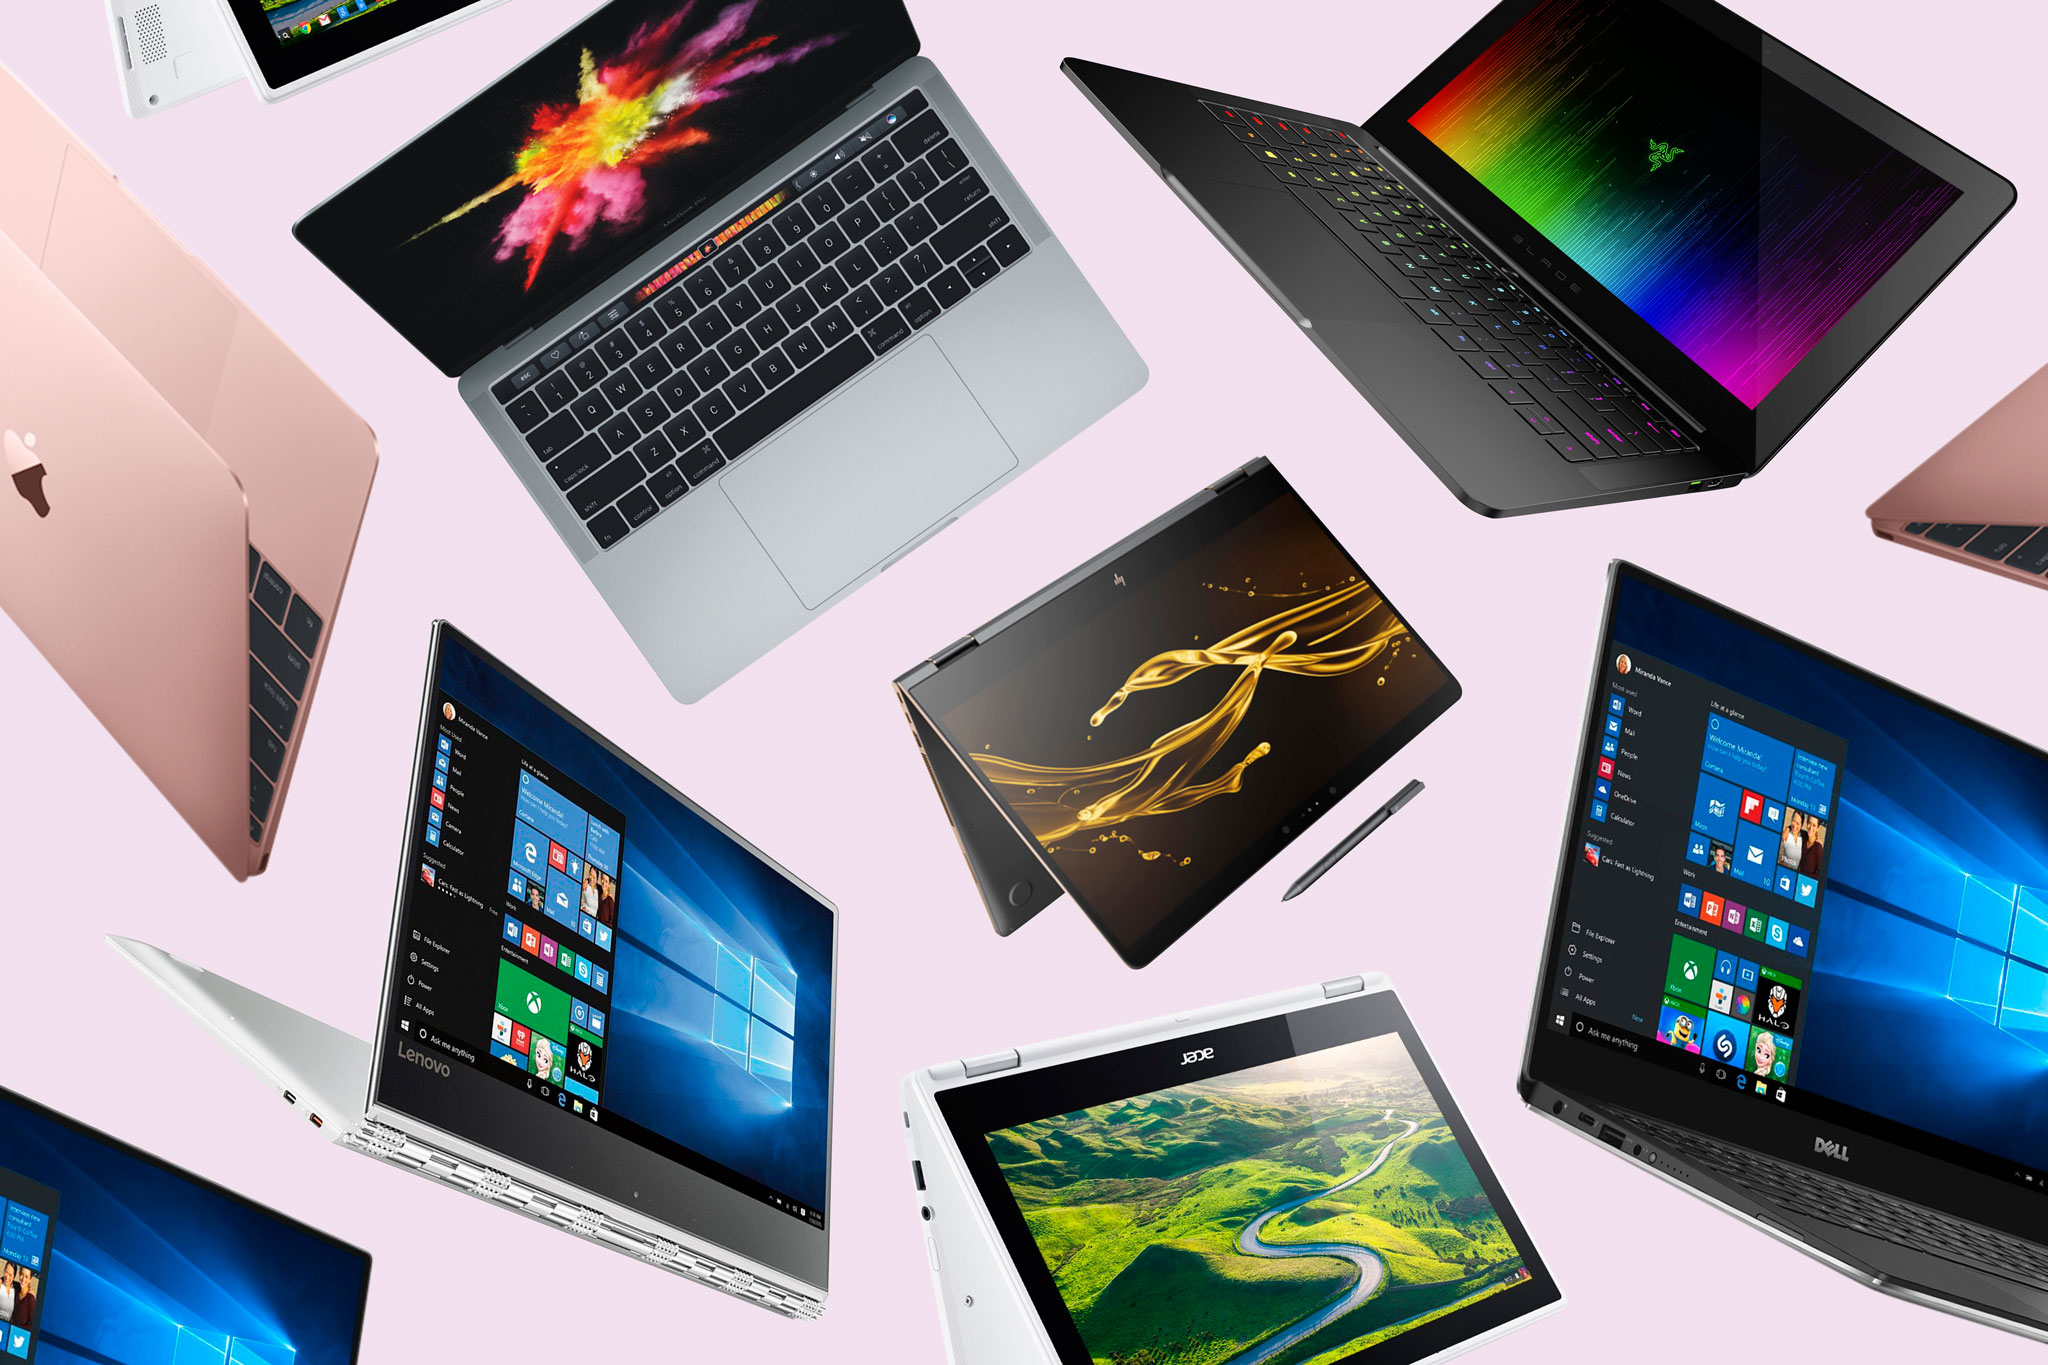

# Machine Learning Project Life cycle

1. Data Collection
2. Data Preparation
    
    A. Exploratory Data Analysis (EDA)
        a.Univariate Analysis
        b.Multivariate Analysis
    B. Data Preprocessing
        a.Feature imputation
        b.Feature encoding
        c.Feature selection
        d.Handle imbalances
3. Model Building

    A. Choosing an algorithm        
    B. Hyperparameter Tuning         
    C. Performance metrics
    
4. Model Deployment



In [95]:
# import all required libraries and visualization tools

import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeClassifier

import scipy.stats as stats 
from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_auc_score,roc_curve,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score   
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import SelectKBest,chi2 
from sklearn.model_selection import GridSearchCV

from sklearn import set_config

import warnings
warnings.filterwarnings("ignore")

In [96]:
#import data from csv file
df =pd.read_csv('laptop_data.csv')

In [97]:
#first 5 columns data
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [98]:
#Last five column data
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [99]:
#shape of dataset
df.shape

(1303, 12)

In [100]:
#converting all the columns name to lower case
df.columns = df.columns.str.lower()
df.head()

,unnamed: 0,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [101]:
#check for duplicates 
df[df.duplicated()]
##No duplicated rows present in the dataframe

,unnamed: 0,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price


In [102]:
#info of dataset (column name, count of cells(excl. NAN), dtype)
df.info()
#Weight datatype need to be changed to float after removing units

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   unnamed: 0        1303 non-null   int64  
 1   company           1303 non-null   object 
 2   typename          1303 non-null   object 
 3   inches            1303 non-null   float64
 4   screenresolution  1303 non-null   object 
 5   cpu               1303 non-null   object 
 6   ram               1303 non-null   object 
 7   memory            1303 non-null   object 
 8   gpu               1303 non-null   object 
 9   opsys             1303 non-null   object 
 10  weight            1303 non-null   object 
 11  price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [103]:
#checking for missing values in dataset
df.isnull().sum()

##No NAN values present in the dataframe features

unnamed: 0          0
company             0
typename            0
inches              0
screenresolution    0
cpu                 0
ram                 0
memory              0
gpu                 0
opsys               0
weight              0
price               0
dtype: int64

In [104]:
#function to get value_counts corresponding to unique categories 
def unique_categories(data):
    for column in data:
        if (data[column].dtype == 'object'):
            print(column,'\n-------')
            print(data[column].value_counts(dropna=True))
            print('='*100)
            print('='*100)
            
unique_categories(df)            

company 
-------
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: company, dtype: int64
typename 
-------
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: typename, dtype: int64
screenresolution 
-------
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800

# Univariate Analysis

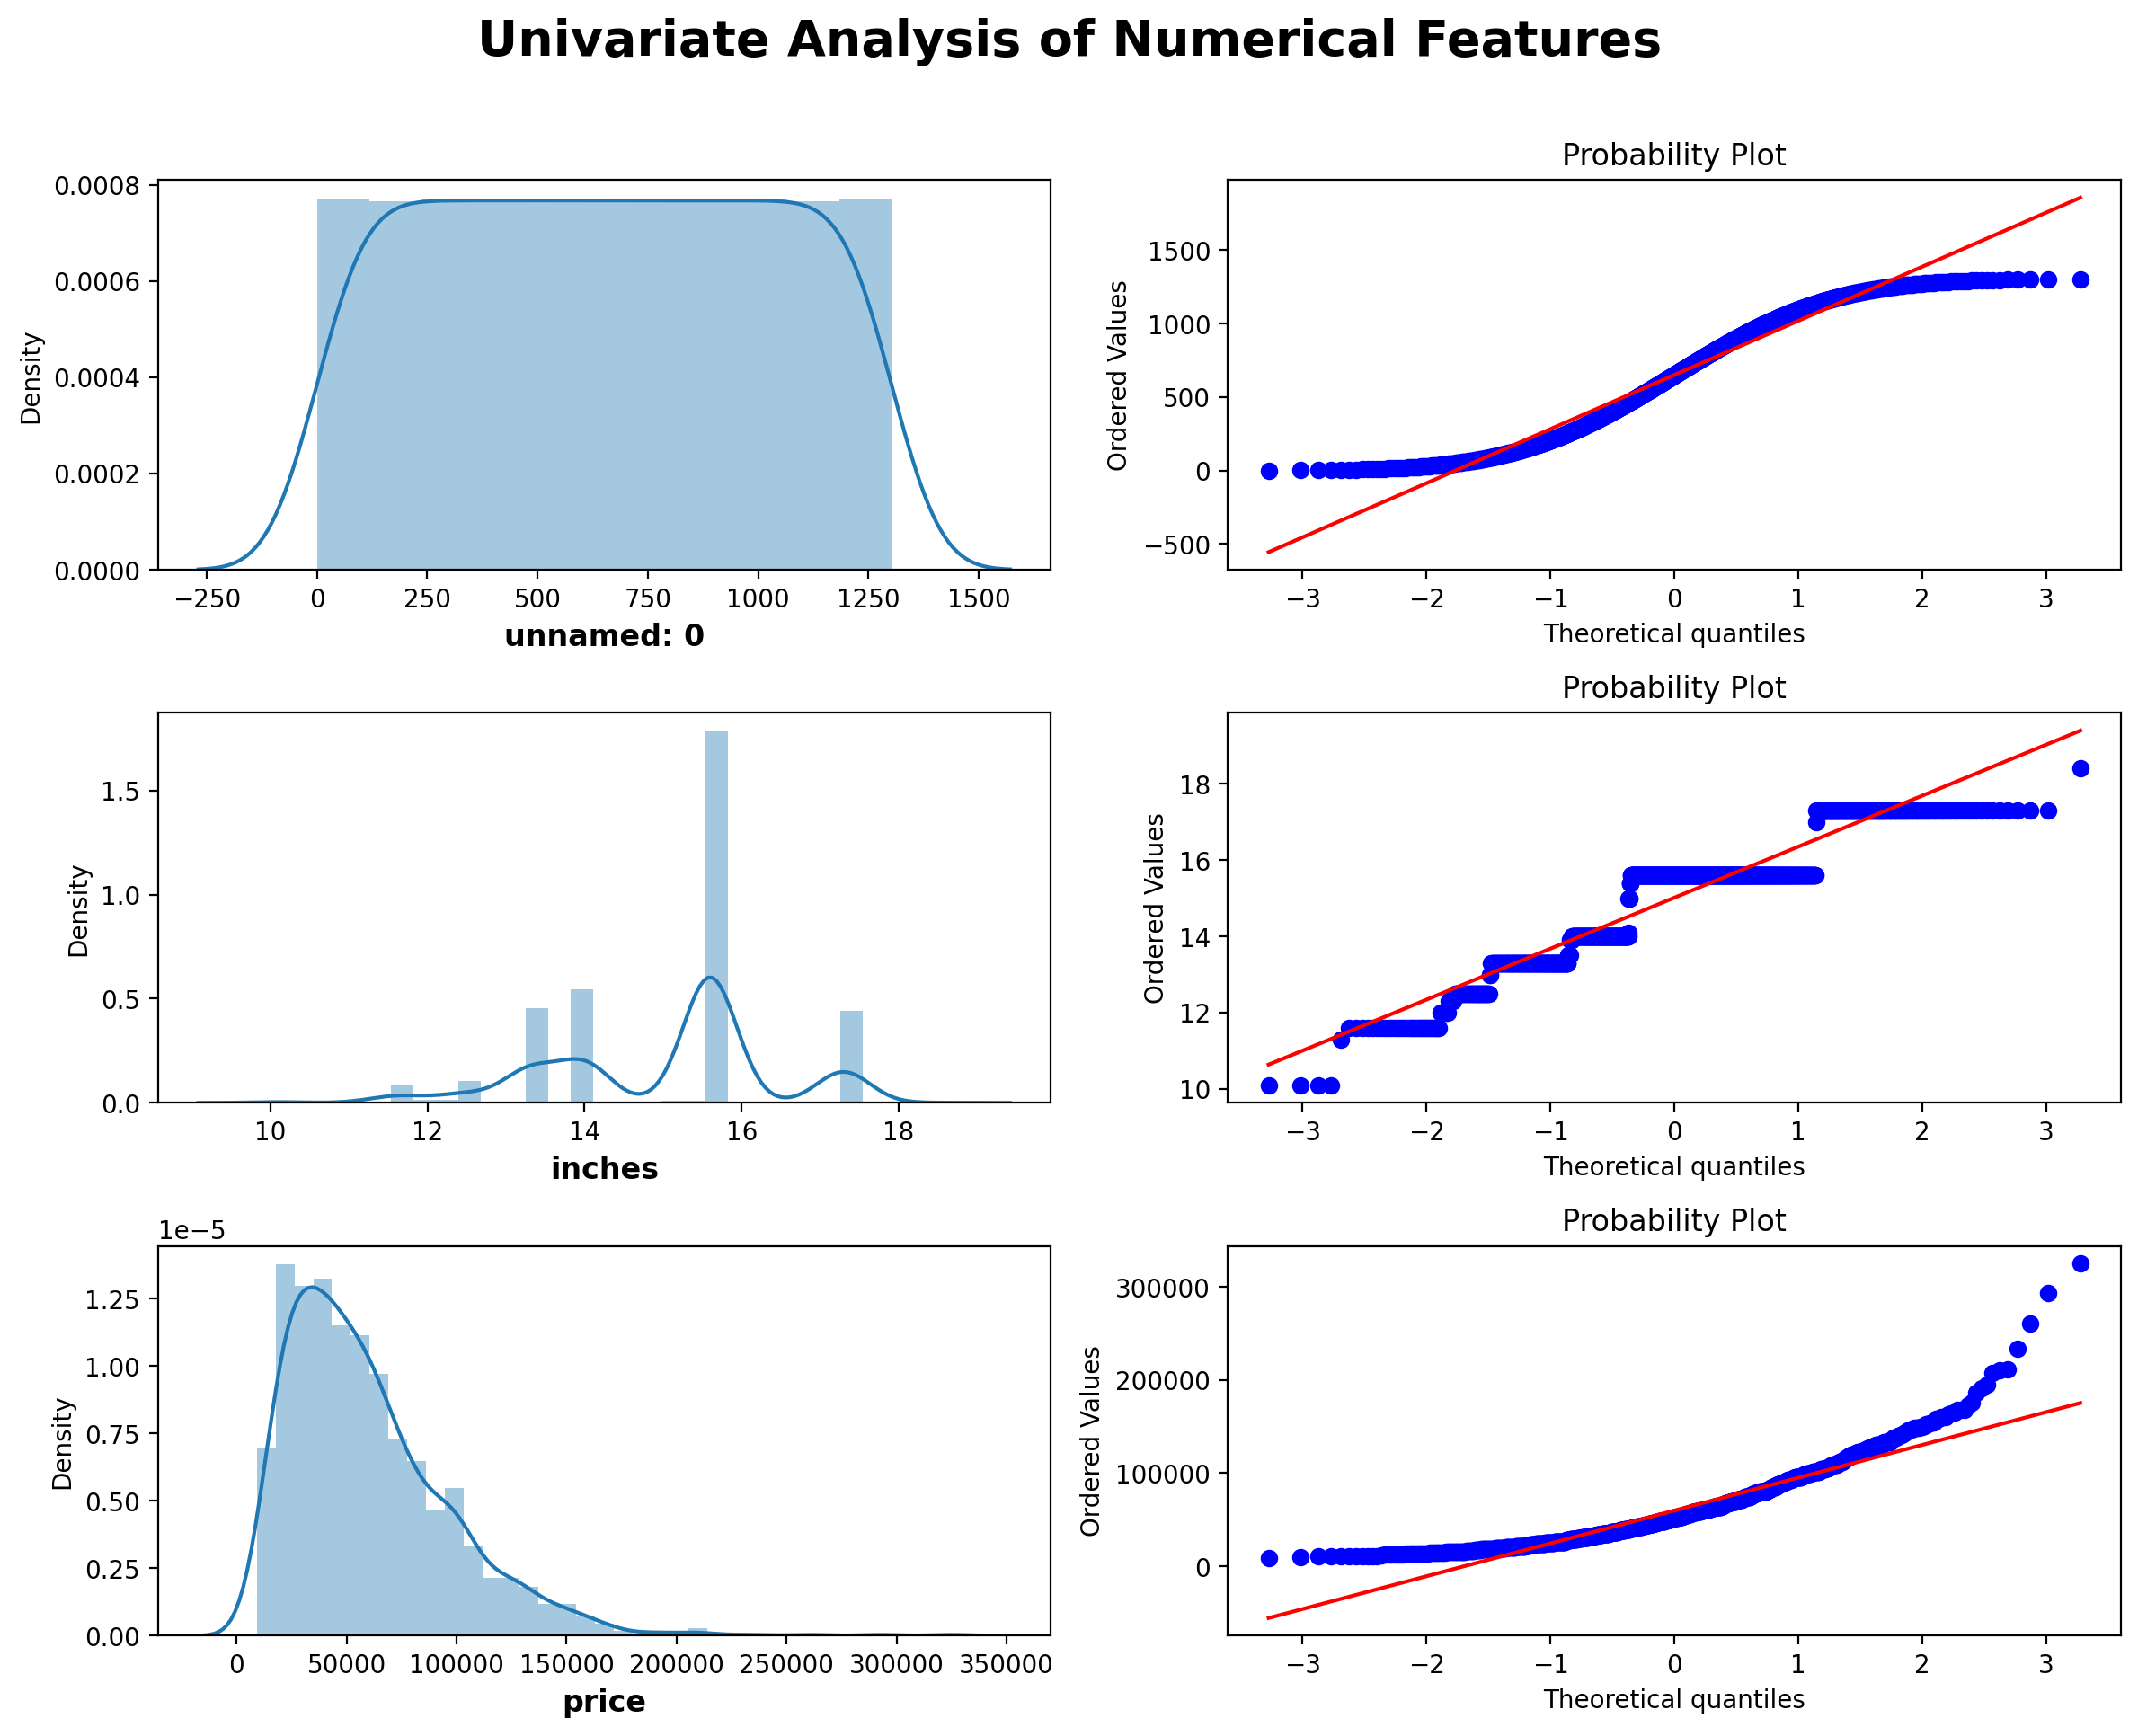

In [105]:
#QQ Plot and Distplot for checking out the skewness of numerical columns-

def univarite_distplot_numerical(df):
    plt.figure(figsize=(12,12),dpi=200)
    plt.suptitle('Univariate Analysis of Numerical Features',fontsize=20, fontweight='bold',alpha=1, y=1.01)
    
    i=0
    for cols in df:
        if df[cols].dtype != 'object':
            plt.subplot(4,2,i+1)
            sns.distplot(x =df[cols])
            plt.xlabel(cols, fontdict={'fontsize':12,'fontweight':'bold'})
            
            plt.subplot(4,2,i+2)
            stats.probplot(df[cols],dist='norm',plot=plt)            
            
            plt.tight_layout()
            i+=2
            
univarite_distplot_numerical(df)


# Observation:
- Based upon above ouptput graphs price is right skewed- Need to perform function transformer with log as a function.
- Unnamed column has no inference on the result the same can be dropped out
- Laptop with 16 inch display is normally distributed

In [106]:
#dropping the unnamed: 0 column from dataframe
df.drop(columns=['unnamed: 0'],inplace=True)

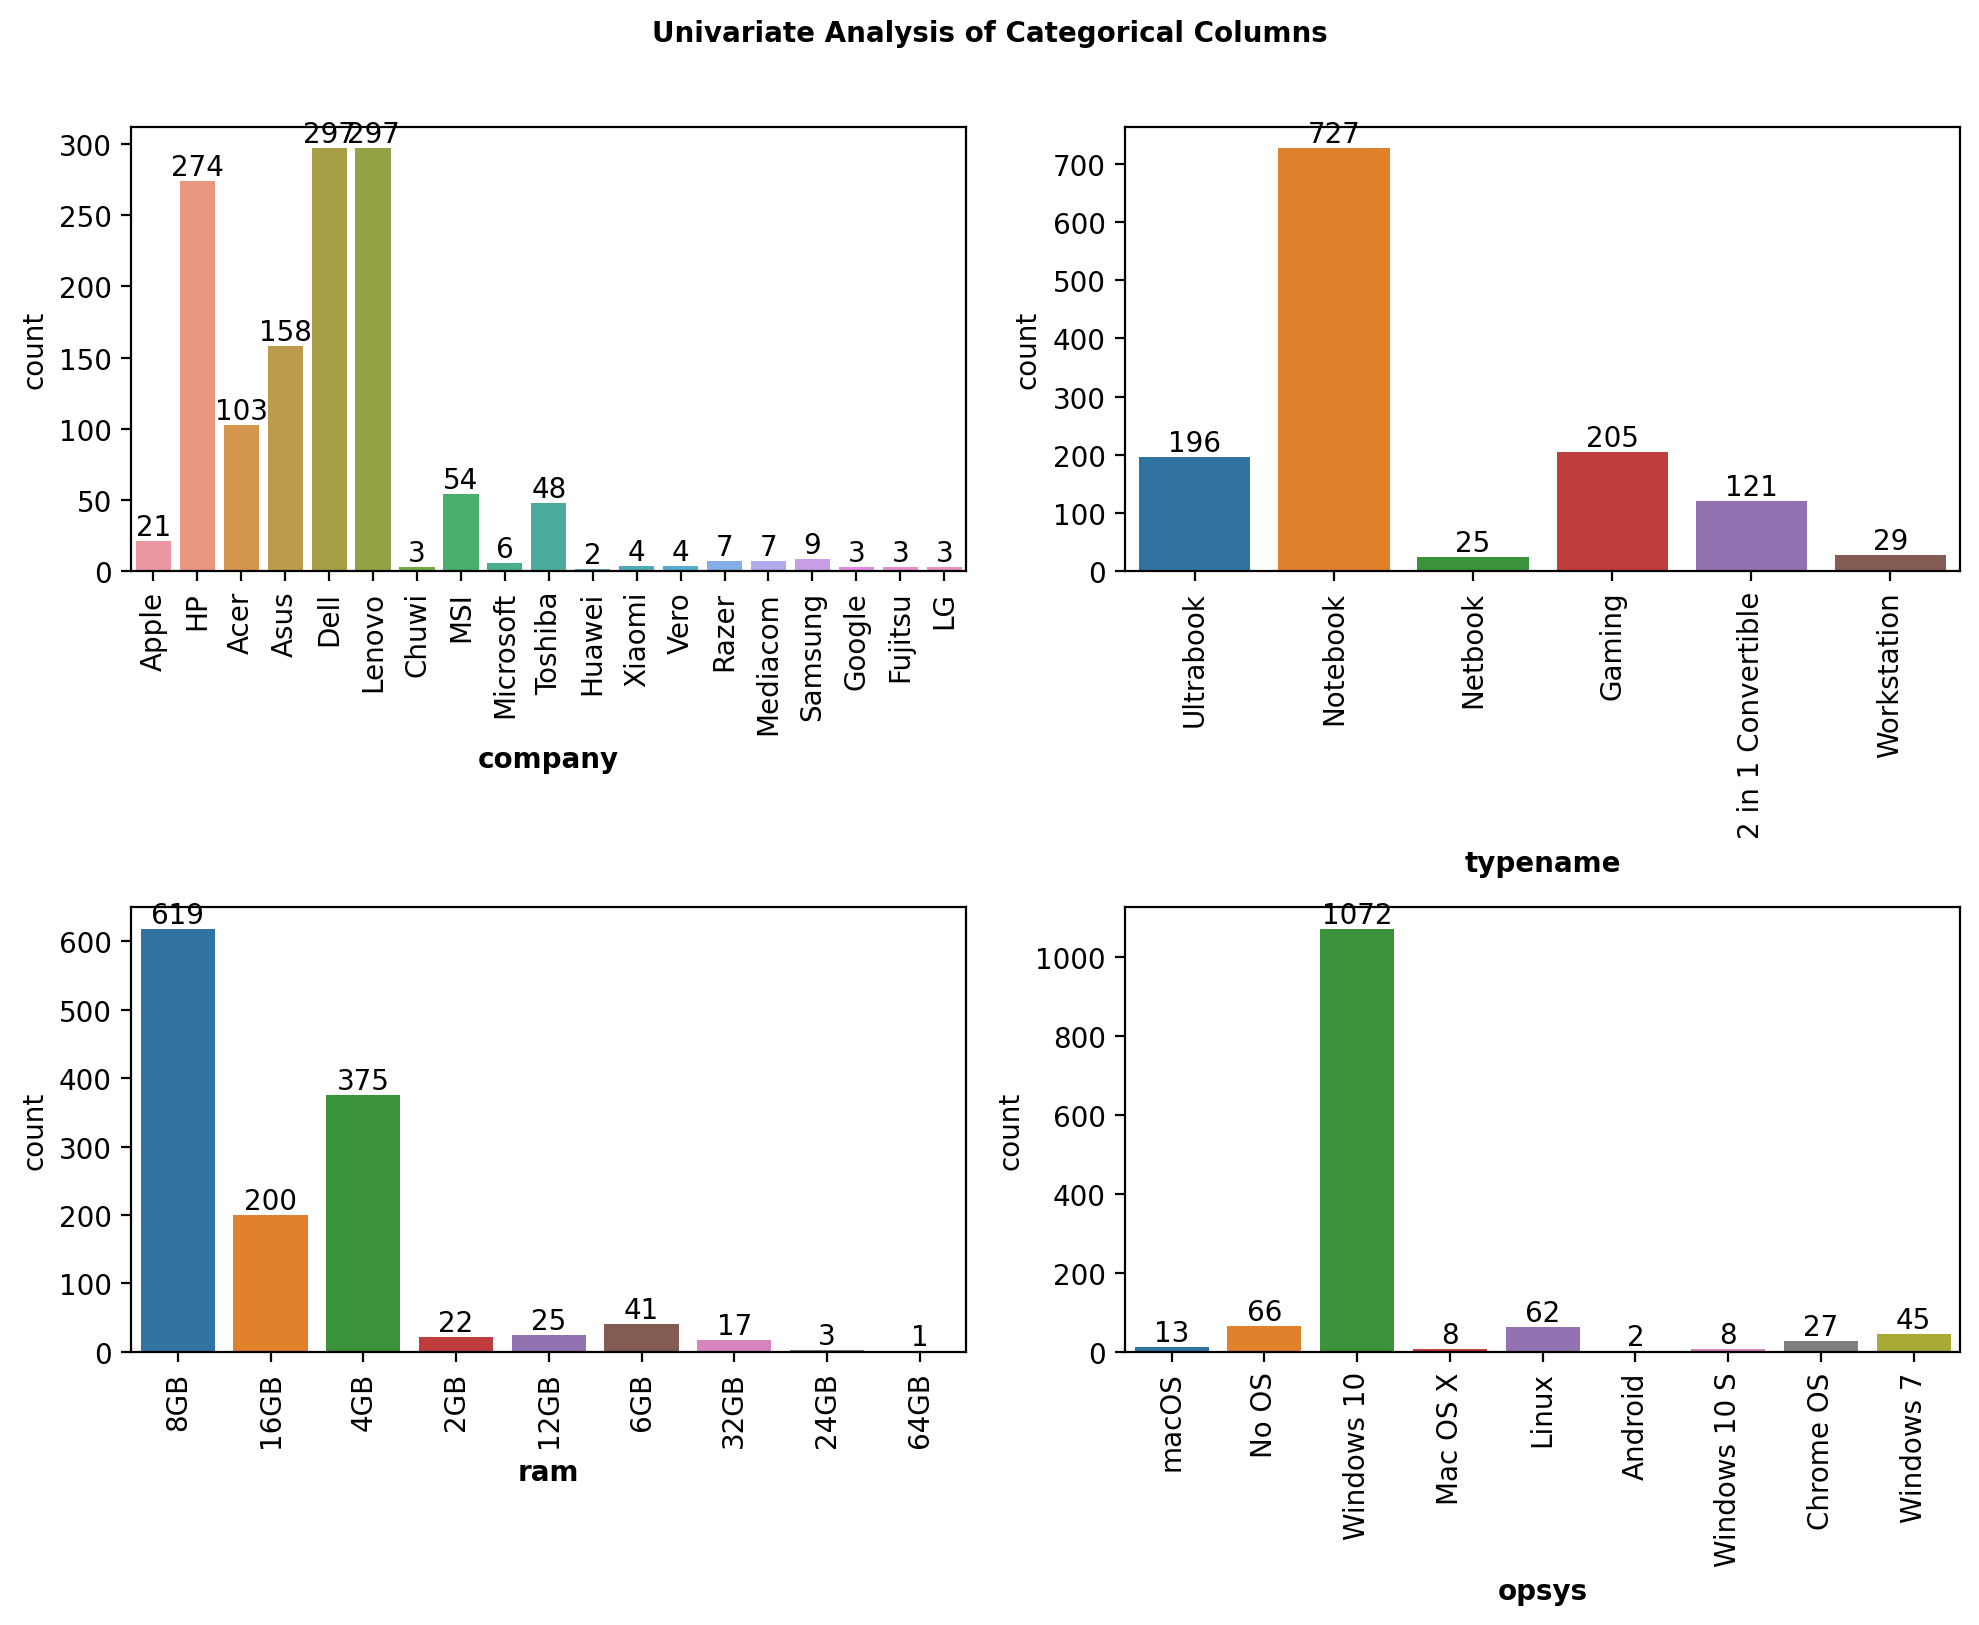

In [107]:
#Plotting countplot of categorical features:

def univariate_plots_categorical(data):
    plt.figure(figsize=(10,8),dpi=200)
    plt.suptitle('Univariate Analysis of Categorical Columns',fontsize=10,fontweight='bold',alpha=1,y=1.01)
    
    i=0
    for cols in data:
        if cols in ['ram','company','typename','opsys']:
            plt.subplot(2,2,i+1)
            ax =sns.countplot(df[cols])
            plt.xticks(rotation='vertical')
            plt.xlabel(cols,fontdict={'fontsize':10,'fontweight':'bold'})
            plt.tight_layout()
            i+=1
            
            for p in ax.containers:
                ax.bar_label(p,padding=0)
                

univariate_plots_categorical(df)


# Observations
- Maximum count comes for 8 GB notebook laptop
- Dell and Lenovo laptops counts highest among all the laptops and the second highest sold laptop was of HP.
- Since laptops like chuwi, Microsoft, Huawei, Xiaomi, vero etc are having count less than 10 we can create a new class for them.
- Window 7 and Window 10 can be combined together as windows category.

# Bivariate Analysis

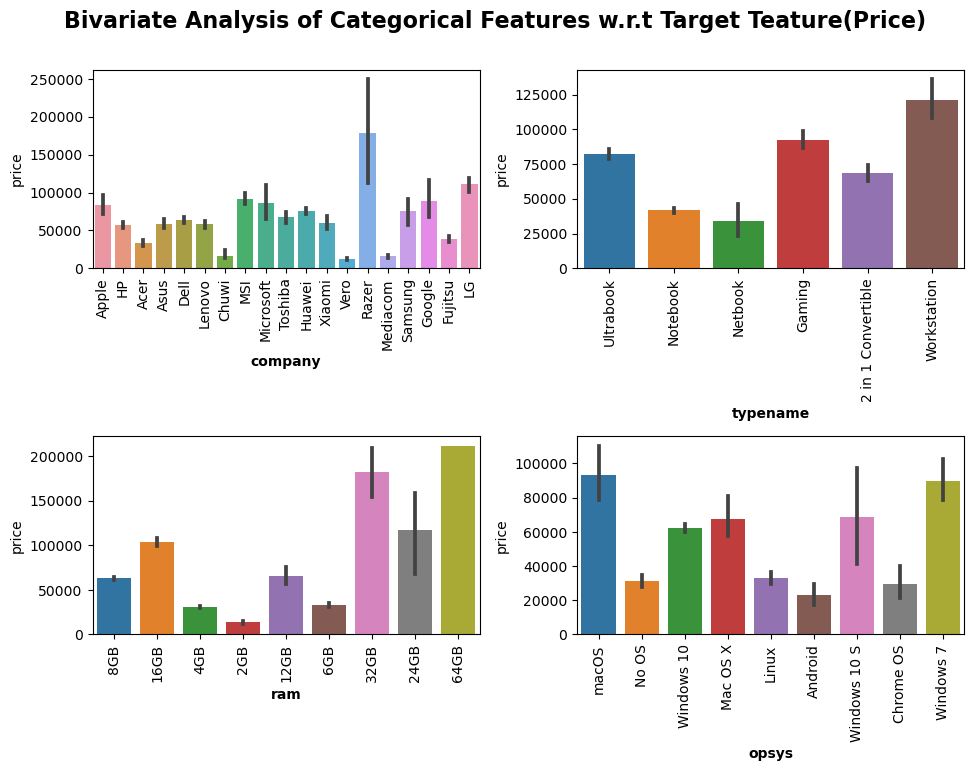

In [108]:
#Bivariate Analysis of categorical Features w.r.t. Target Teature (Price)

def Bivariate_analysis_Categorical(data):
    
    plt.figure(figsize=(10,7),dpi=100)
    plt.suptitle('Bivariate Analysis of Categorical Features w.r.t Target Teature(Price)',fontsize =16, fontweight = 'bold', alpha =1,y =1.01)    
    i=0
    for cols in data:
        if cols in ['ram','company','typename','opsys']: 
            plt.subplot(2,2,i+1)
            sns.barplot(df[cols],df['price'])
            plt.tight_layout()
            plt.xlabel(cols,fontdict={'fontsize':10,'fontweight':'bold'})
            plt.xticks(rotation='vertical')
            i=i+1
            
Bivariate_analysis_Categorical(df)

##Observation
##1.Razer company laptops price are the highest ones.
##2.Workstation price is highest as usual
##3.Price of laptop increases as the ram size increases
##4.MacOS is the highest priced OS having laptop.
##5.Screenresolution,memory and CPU feature has various type of information that need to be extracted for better performance of model


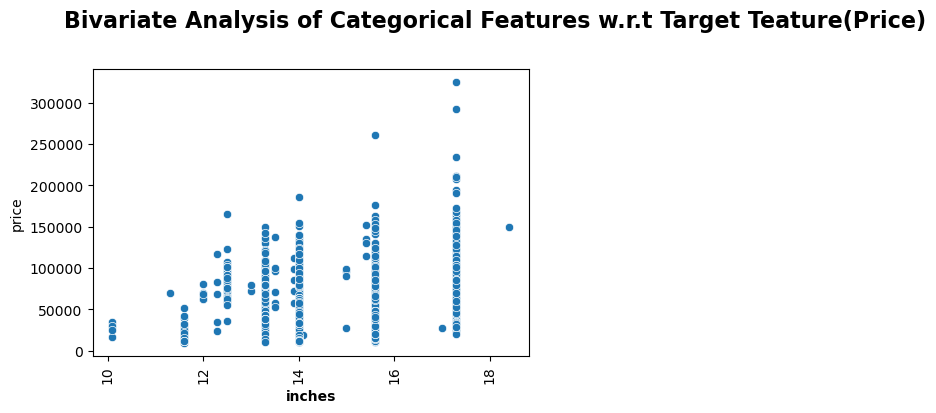

In [109]:
#Bivariate Analysis of numerical Features w.r.t. Target Feature (Price):


def Bivariate_analysis_Categorical(data):
    
    plt.figure(figsize=(10,7),dpi=100)
    plt.suptitle('Bivariate Analysis of Categorical Features w.r.t Target Teature(Price)',fontsize =16, fontweight = 'bold', alpha =1,y =1.01)    
    i=0
    for cols in data:
        if df[cols].dtype !='object' and (cols not in 'price'): 
            plt.subplot(2,2,i+1)
            sns.scatterplot(df[cols],df['price'])
            plt.tight_layout()
            plt.xlabel(cols,fontdict={'fontsize':10,'fontweight':'bold'})
            plt.xticks(rotation='vertical')
            i=i+1
            
Bivariate_analysis_Categorical(df)

<AxesSubplot:>

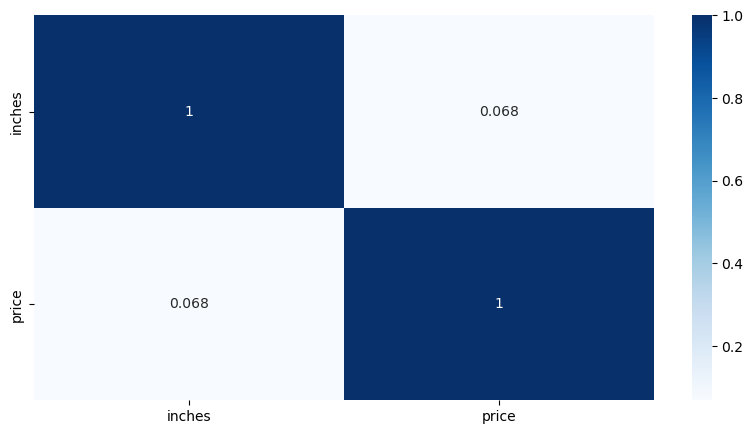

In [110]:
#correlation matrix of the dataset
plt.figure(figsize=(10, 5),dpi = 100)
sns.heatmap(df.corr(),annot=True,cmap='Blues')

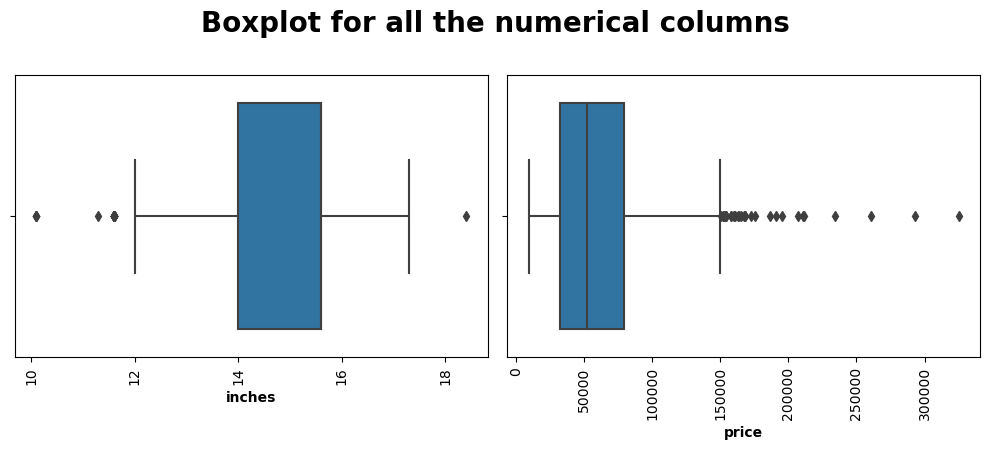

In [111]:
#check out the boxplot of all numerical features

def boxplot(data):
    plt.figure(figsize=(10,7),dpi=100)
    plt.suptitle('Boxplot for all the numerical columns',fontsize=20,fontweight='bold',alpha =1,y =1.01)
    
    i=0
    for cols in data:
        if df[cols].dtype !='object' : 
            plt.subplot(2,2,i+1)
            sns.boxplot(cols,data=data)
            plt.tight_layout()
            plt.xlabel(cols,fontdict={'fontsize':10,'fontweight':'bold'})
            plt.xticks(rotation='vertical')
            i=i+1
            
boxplot(df)

# Observation

- Outliers are present in inches and price feature,they might be helpful in training the model.So self is not removing them as of now.


# Feature Engineering

In this section we will perform the following tasks:
## 1. **Handling missing values**:

There are number of ways to deal with missing values



**In deletion**, the particular feature or row having huge number of missing values are removed.

**In imputation**, the missing values are imputed using some techniques such as:

### A. Univariate imputation techniques:
- the missing values are replaced using the balance data of that particular feature. Most famous and simple methods are Mean,Median and Mode. Out of which mean and median are used for numerical feature imputation whereas mode is used for categorical feature imputation.

### B. Multivariate imputation techniques:
- In this feature are imputed based on their relation with other features. Most used imputation techniques are:
 - KNN Imputer: KNN algorithm is used for feature imputation. it is suitable for both categorical as well as numerical features. 
 - Iterative Imputation: MICE(Multiple Imputation by Chained Equation) technique is used under this imputation. in this any machine learning algorithm can be used for multiple iteration and imputing the features. it is suitable for both categorical as well as numerical features.
 
## 2. Handling outliers:
Oulier may impact the performance of the models but sometime they might be helpul. most commonly used techniques for treating outliers are:

**Z-score:** we use the concept of standard normal distribution. every value outside -3 to +3 is treated as outlier and can be treated depending upon the problem we are trying to solve

**IQR method:** we use the concept of inter quartile range. every value outside range of lower limit to upper limit is treated as outlier and can be treated depending upon the problem statement

**Percentile method:** Based on problem statement and domain knowledge, we can choose the upper and lower limit for outlier treatment using percentile method

## 3. Categorical features encoding
- Model do understand numerical values only, hence categorical features needs to be converted into numerical values. Most common methods are given below:
 - One Hot Encoding
 - Label Encoding
 - Ordinal Encoding
 - Count of Frequency Encoding
 - Target Guided Ordinal Encoding
 - Probability Ratio Encoding
 
## 4. Feature scaling

- Every feature is scaled to same range for having better results.

In [112]:
#checking for any missing values
df.isnull().mean()
# As calculated above there are no mising values in given data set 

company             0.0
typename            0.0
inches              0.0
screenresolution    0.0
cpu                 0.0
ram                 0.0
memory              0.0
gpu                 0.0
opsys               0.0
weight              0.0
price               0.0
dtype: float64

In [113]:
#ram column need feature engineering via removing GB from

df['ram'] = df['ram'].str.replace('GB','')

In [114]:
df['weight'] = df['weight'].str.replace('kg','')

In [115]:
df['ram']    = df['ram'].astype('int')
df['weight'] = df['weight'].astype('float')

Text(0.5, 1.0, 'Barplot for ram')

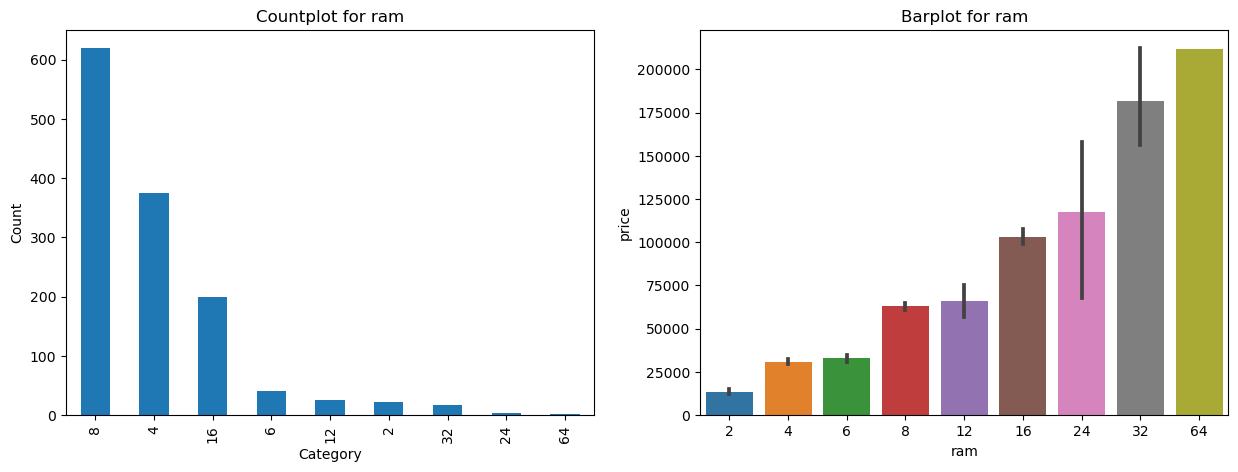

In [116]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df['ram'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Countplot for ram')

plt.subplot(1,2,2)
sns.barplot(df.ram,df.price)
plt.title('Barplot for ram')

In [117]:
df.sample(5)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price
116,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.63,57755.520
732,HP,Notebook,15.6,Full HD 1920x1080,AMD A9-Series A9-9420 3GHz,6,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.10,34632.000
303,Lenovo,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,2TB HDD,Nvidia GeForce 940MX,No OS,2.20,29250.720
606,Toshiba,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.20,74538.720
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.336


<AxesSubplot:xlabel='price', ylabel='Density'>

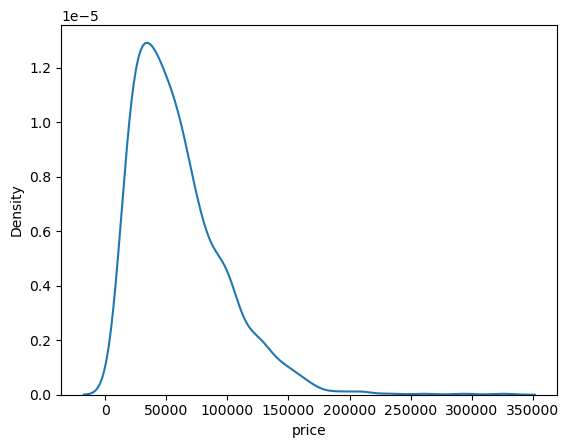

In [118]:
sns.distplot(df.price,df.weight,hist=False)

In [119]:
#Feature engineering on screenresolution
df.screenresolution.value_counts()
#screenresolution has information like Full HD,Pixel etc that need to be extracted in different features for 
#better accuracy of prediction and modelling

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [120]:
#extracting information of touchscreen laptops
##Touchscreen data extraction
df['Touchscreen'] = df.screenresolution.apply(lambda x: 1 if 'Touchscreen' in x else 0 )

Text(0.5, 1.0, 'Barplot for Touchscreen')

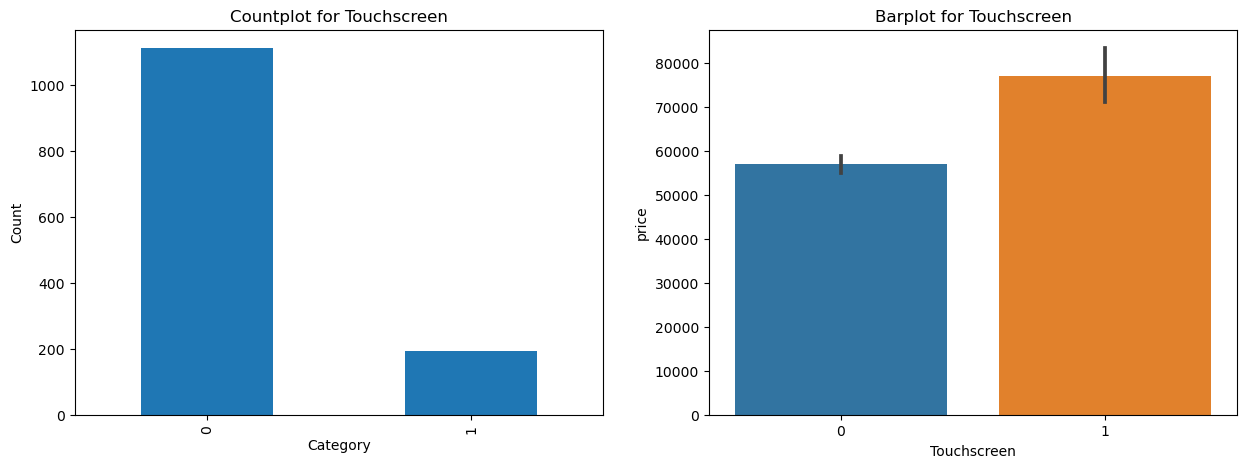

In [121]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df['Touchscreen'].value_counts().plot(kind='bar')
plt.title('Countplot for Touchscreen')
plt.xlabel('Category')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.barplot(df.Touchscreen,df.price)
plt.title('Barplot for Touchscreen')



In [122]:
##IPS data extraction
df['IPS'] = df.screenresolution.apply(lambda x: 1 if 'IPS' in x else 0)

Text(0.5, 1.0, 'Barplot for IPS')

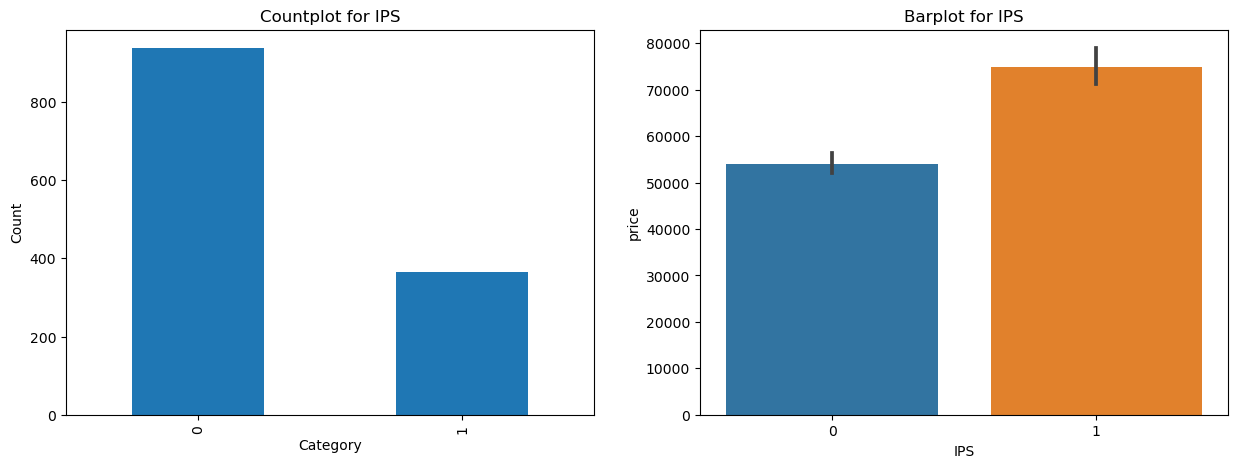

In [123]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df['IPS'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Countplot for IPS')

plt.subplot(1,2,2)
sns.barplot(df.IPS,df.price)
plt.title('Barplot for IPS')

In [124]:
#resolution data extraction

new = df.screenresolution.str.split('x',n=1,expand=True)
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.sample(5)

,company,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price,Touchscreen,IPS,X_res,Y_res
112,Lenovo,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.37,74538.72,1,1,IPS Panel Full HD / Touchscreen 1920,1080
1278,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,500GB HDD,Intel HD Graphics,Windows 10,2.20,20193.12,0,0,1366,768
162,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 520,Windows 10,2.13,38787.84,0,0,Full HD 1920,1080
23,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.62,43636.32,1,0,Full HD / Touchscreen 1920,1080
632,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,Intel UHD Graphics 620,Windows 10,1.80,44169.12,0,0,Full HD 1920,1080


In [125]:
df.X_res =df.X_res.str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [126]:
#changing the data type to int
df['X_res'] = df.X_res.astype('int')
df['Y_res'] = df.Y_res.astype('int')


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           1303 non-null   object 
 1   typename          1303 non-null   object 
 2   inches            1303 non-null   float64
 3   screenresolution  1303 non-null   object 
 4   cpu               1303 non-null   object 
 5   ram               1303 non-null   int32  
 6   memory            1303 non-null   object 
 7   gpu               1303 non-null   object 
 8   opsys             1303 non-null   object 
 9   weight            1303 non-null   float64
 10  price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int32  
 14  Y_res             1303 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 137.6+ KB


In [128]:
#corelation of all features with price
df.corr()['price']

##Ram,Touchscreen,IPS, X-res and Y_res have strong relation with price
##Inches has least relation with price. The same can be dropped

inches         0.068197
ram            0.743007
weight         0.210370
price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: price, dtype: float64

In [129]:
#Since X_res and Y_res has equal relation with targetted feature and inches has least relation with price. we can create
#pixcel per inch (ppi) feature in place of above said features

df['ppi'] = ((df['X_res']**2 + df['Y_res']**2)**0.5)/df['inches']
df.drop(columns=['screenresolution','inches','X_res','Y_res'],inplace=True)

In [130]:
df.sample(5)

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,Touchscreen,IPS,ppi
223,HP,Notebook,Intel Core i5 8250U 1.6GHz,8,1TB HDD,Intel UHD Graphics 620,Windows 10,2.10,42304.3200,0,0,141.211998
1074,Lenovo,Ultrabook,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.30,91294.7472,1,1,176.232574
1109,Asus,Gaming,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.59,71341.9200,0,1,141.211998
1132,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.50,14811.8400,0,0,111.935204
463,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,8,512GB SSD,AMD Radeon R7 M460,No OS,1.50,42570.7200,0,1,157.350512


In [131]:
#Feature extraction from cpu feature/column

df['cpu_name'] = df['cpu'].apply(lambda x: ' '.join(x.split()[0:3]))
df.sample(5)

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,Touchscreen,IPS,ppi,cpu_name
1047,MSI,Gaming,Intel Core i7 6820HK 2.7GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,82351.6992,0,1,127.335675,Intel Core i7
157,Asus,2 in 1 Convertible,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.10,70063.2000,1,0,165.632118,Intel Core i5
79,HP,Notebook,Intel Core i5 8250U 1.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce 930MX,Windows 10,2.50,52054.5600,0,0,127.335675,Intel Core i5
470,HP,2 in 1 Convertible,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Intel UHD Graphics 620,Windows 10,1.29,106506.7200,1,1,331.264236,Intel Core i7
498,Lenovo,Notebook,Intel Core i3 7100U 2.4GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.40,50562.7200,0,1,165.632118,Intel Core i3


In [132]:
def cpu_processor(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    elif text.split()[0] == 'Intel':     
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'

df['cpu_name'] = df.cpu_name.apply(cpu_processor)
df.sample(5)

,company,typename,cpu,ram,memory,gpu,opsys,weight,price,Touchscreen,IPS,ppi,cpu_name
1292,Dell,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,500GB HDD,Intel HD Graphics,Windows 10,2.20,20193.12,0,0,100.454670,Other Intel Processor
367,Lenovo,Gaming,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,No OS,2.40,43103.52,0,1,141.211998,Intel Core i5
59,Asus,Notebook,Intel Core i3 6006U 2GHz,4,256GB SSD,Intel HD Graphics 520,Linux,2.00,22111.20,0,0,141.211998,Intel Core i3
508,HP,Ultrabook,Intel Core i7 7500U 2.7GHz,8,512GB SSD,Intel HD Graphics 620,Windows 10,1.34,70489.44,0,1,165.632118,Intel Core i7
1215,Acer,Netbook,Intel Celeron Dual Core 3205U 1.5GHz,2,32GB SSD,Intel HD Graphics,Chrome OS,1.30,9270.72,0,0,135.094211,Other Intel Processor


Text(0.5, 1.0, 'Barplot for cpu_name')

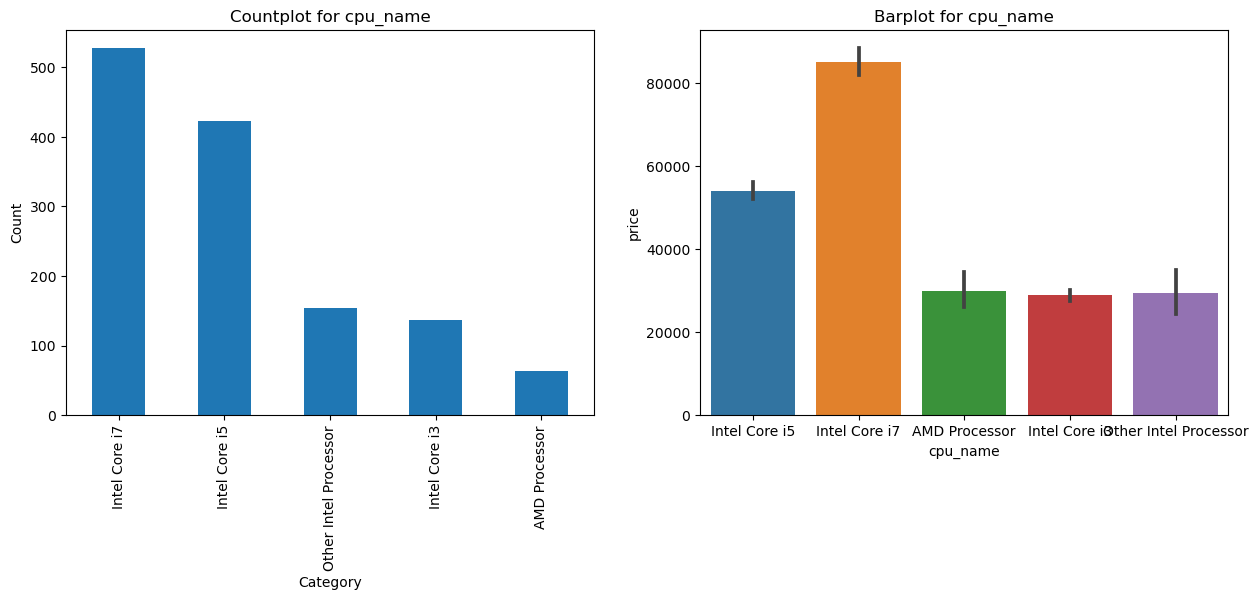

In [133]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df['cpu_name'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Countplot for cpu_name')

plt.subplot(1,2,2)
sns.barplot(df.cpu_name,df.price)
plt.title('Barplot for cpu_name')

In [134]:
df.drop(columns=['cpu'],inplace=True)

In [135]:
#Feature extraction from opsys feature/column:

def opsys_extract(name):
    if name == 'Windows 10' or name == 'Windows 7' or name == 'Windows 10 S':
        return 'Windows'
    elif name == 'macOS' or name == 'Mac OS X':
        return 'Mac'
    else:
        return 'Other/No OS/Linux'


df['os'] = df.opsys.apply(opsys_extract)
df.sample(5)


,company,typename,ram,memory,gpu,opsys,weight,price,Touchscreen,IPS,ppi,cpu_name,os
701,Lenovo,Notebook,4,256GB SSD,AMD Radeon 530,Windows 10,2.2,21258.72,0,0,141.211998,AMD Processor,Windows
465,Asus,Notebook,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.0,16197.12,0,0,100.454670,Other Intel Processor,Windows
871,Lenovo,Notebook,4,1TB HDD,AMD Radeon R5 M430,No OS,2.2,25521.12,0,0,141.211998,Intel Core i3,Other/No OS/Linux
672,Lenovo,2 in 1 Convertible,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.3,55091.52,1,1,165.632118,Intel Core i5,Windows
164,Acer,Notebook,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.1,18541.44,0,0,100.454670,Other Intel Processor,Windows


In [136]:
#droping the opsys column
df.drop(columns=['opsys'],inplace=True)

Text(0.5, 1.0, 'Barplot for os')

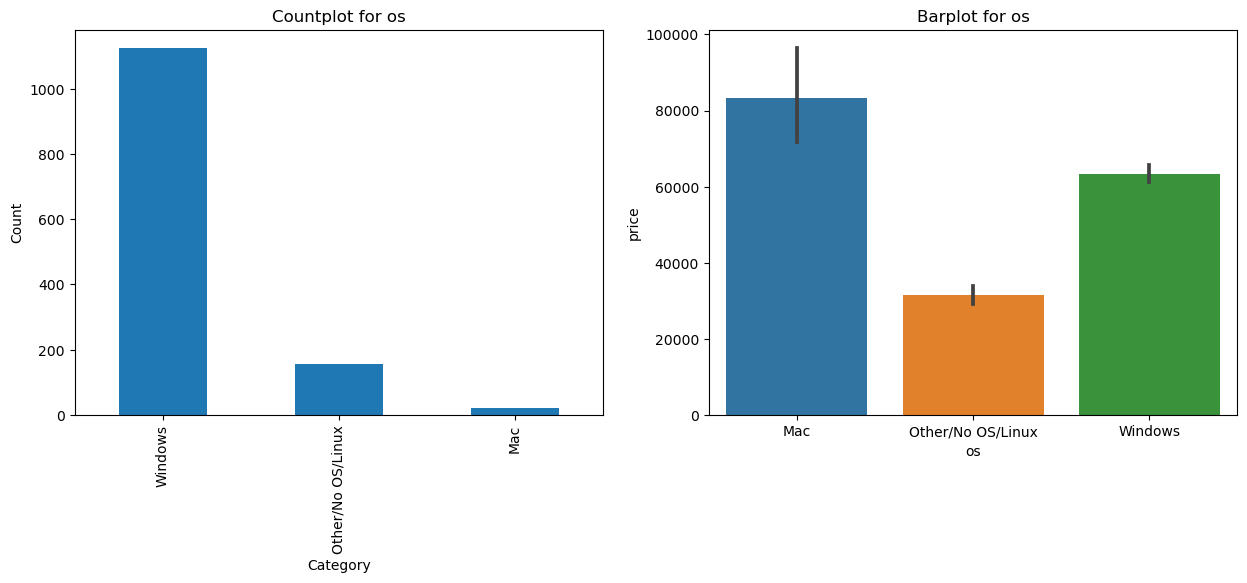

In [137]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df['os'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Countplot for os')

plt.subplot(1,2,2)
sns.barplot(df.os,df.price)
plt.title('Barplot for os')

In [138]:
#Feature extraction from graphic processing unit(gpu) feature/column:
df['gpu'] = df['gpu'].apply(lambda x: x.split()[0])
df.sample(5)

,company,typename,ram,memory,gpu,weight,price,Touchscreen,IPS,ppi,cpu_name,os
653,MSI,Gaming,8,128GB SSD + 1TB HDD,Nvidia,2.20,63499.104,0,0,141.211998,Intel Core i7,Windows
684,Lenovo,2 in 1 Convertible,8,512GB SSD,Intel,1.19,79866.720,1,1,165.632118,Intel Core i7,Windows
586,HP,Gaming,16,256GB SSD + 1TB HDD,Nvidia,3.78,79813.440,0,1,127.335675,Intel Core i7,Windows
1264,Dell,Notebook,2,500GB HDD,Intel,2.20,20193.120,0,0,100.454670,Other Intel Processor,Windows
1157,Lenovo,Ultrabook,12,512GB SSD,Intel,1.40,122490.720,0,0,157.350512,Intel Core i7,Windows


Text(0.5, 1.0, 'Barplot for gpu')

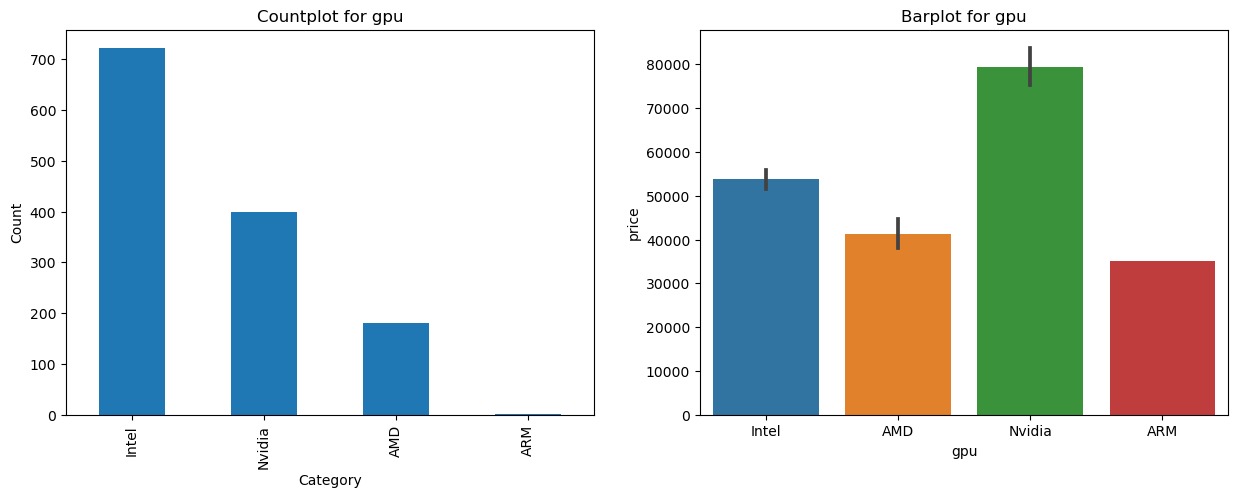

In [139]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
df['gpu'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Countplot for gpu')

plt.subplot(1,2,2)
sns.barplot(df.gpu,df.price)
plt.title('Barplot for gpu')

In [140]:
df.corr()['price']

ram            0.743007
weight         0.210370
price          1.000000
Touchscreen    0.191226
IPS            0.252208
ppi            0.473487
Name: price, dtype: float64

In [141]:
#Feature extraction from memory feature/column:
df['new'] = df.memory.astype(str).replace('\.0','',regex=True)
df["new"] = df.new.str.replace('GB','')
df["new"] = df.new.str.replace('TB','000')

new = df.new.str.split('+',n=1,expand=True)

df['first'] = new[0]
df['second'] = new[1]
df.sample(5)

df['layer1HDD'] = df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['layer1SSD'] = df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['layer1Hybrid'] = df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['layer1Flash_storage'] = df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
df['first_GB'] = df['first'].str.replace(r'\D','')

df.second.fillna('0',inplace=True)

df['layer2HDD'] = df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['layer2SSD'] = df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['layer2Hybrid'] = df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['layer2Flash_storage'] = df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)
df['second_GB'] = df['second'].str.replace(r'\D','')

df['first_GB']= df['first_GB'].astype(int)
df['second_GB'] = df['second_GB'].astype(int)

df['HDD'] = (df['first_GB']*df['layer1HDD']+ df['second_GB']*df['layer2HDD'])
df['SSD'] = (df['first_GB']*df['layer1SSD']+ df['second_GB']*df['layer2SSD'])
df['Hybrid'] = (df['first_GB']*df['layer1Hybrid']+ df['second_GB']*df['layer2Hybrid'])
df['Flash_Storage'] = (df['first_GB']*df['layer1Flash_storage']+ df['second_GB']*df['layer2Flash_storage'])

df.drop(columns=['first_GB','second_GB','new','first','second','memory','layer1SSD','layer2SSD','layer1HDD','layer2HDD','layer1Hybrid','layer2Hybrid','layer1Flash_storage','layer2Flash_storage'],inplace=True)

In [142]:
df.sample(4)

,company,typename,ram,gpu,weight,price,Touchscreen,IPS,ppi,cpu_name,os,HDD,SSD,Hybrid,Flash_Storage
1224,Dell,2 in 1 Convertible,4,Intel,2.08,27119.52,1,0,146.860478,Intel Core i3,Windows,500,0,0,0
759,Acer,Notebook,4,Intel,2.10,31914.72,0,0,100.454670,Intel Core i5,Windows,0,256,0,0
238,Asus,Gaming,32,Nvidia,4.70,207259.20,0,0,127.335675,Intel Core i7,Windows,1000,512,0,0
254,Acer,Notebook,4,Nvidia,3.00,37402.56,0,1,127.335675,Intel Core i3,Windows,0,256,0,0


In [143]:
df.corr().price

ram              0.743007
weight           0.210370
price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: price, dtype: float64

In [144]:
#since HDD and flash_storage has very less relation wih price, better to drop these two columns for better predictions

df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [145]:
df.sample(5)


,company,typename,ram,gpu,weight,price,Touchscreen,IPS,ppi,cpu_name,os,HDD,SSD
838,Lenovo,Notebook,4,Intel,1.50,17316.00,0,0,111.935204,Other Intel Processor,Other/No OS/Linux,0,0
771,Samsung,2 in 1 Convertible,16,AMD,1.71,95850.72,1,0,146.860478,Intel Core i7,Windows,0,256
778,Razer,Gaming,16,Nvidia,1.95,154458.72,0,0,157.350512,Intel Core i7,Windows,0,512
60,Dell,Notebook,16,AMD,2.80,69210.72,0,0,127.335675,Intel Core i7,Windows,2000,256
341,Lenovo,Notebook,12,AMD,2.20,47898.72,0,0,141.211998,AMD Processor,Windows,2000,0


In [146]:
df.corr().price

ram            0.743007
weight         0.210370
price          1.000000
Touchscreen    0.191226
IPS            0.252208
ppi            0.473487
HDD           -0.096441
SSD            0.670799
Name: price, dtype: float64

# Data splitting for training

In [147]:
x= df.drop(columns=['price'])
y= np.log(df.price)
          

In [148]:
#ctegorical columns
cat_cols = x.select_dtypes(include = 'object').columns
print('Categorical Columns in independent features dataset:',cat_cols)
print('='*85)

#numerical columns
num_cols = x.select_dtypes(include = ['int64','float64']).columns
print('Numerical Columns in independent features dataset:',num_cols)

Categorical Columns in independent features dataset: Index(['company', 'typename', 'gpu', 'cpu_name', 'os'], dtype='object')
Numerical Columns in independent features dataset: Index(['weight', 'Touchscreen', 'IPS', 'ppi', 'HDD', 'SSD'], dtype='object')


In [149]:
#split data into train and test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.15,random_state=2)

print('Shape of x_train:',x_train.shape)
print('Shape of x_test:',x_test.shape)

#training ctegorical columns
train_cat_cols = x_train.select_dtypes(include = 'object').columns
print('Categorical Columns in training dataset:',train_cat_cols)
print('='*85)

#training numerical columns
train_num_cols = x_train.select_dtypes(include = ['int64','float64']).columns
print('Numerical Columns in training dataset:',train_num_cols)

Shape of x_train: (1107, 12)
Shape of x_test: (196, 12)
Categorical Columns in training dataset: Index(['company', 'typename', 'gpu', 'cpu_name', 'os'], dtype='object')
Numerical Columns in training dataset: Index(['weight', 'Touchscreen', 'IPS', 'ppi', 'HDD', 'SSD'], dtype='object')


In [150]:
#Encoding train_num_cols with OHE:

encoding_params = [('categorical_encoder', OneHotEncoder(sparse=False,drop='first'),make_column_selector(dtype_include=object))]
#creating an object of column Transformer for feature encoding of categorical eatures
cat_encoding_trf = ColumnTransformer(transformers=encoding_params,remainder='passthrough')



In [151]:
#feature scaling of all the feature of extracted data

scaling_params = [('Scale',StandardScaler(),slice(0,31))]
#creating an object of column Transformer for feature scaling
Scaler = ColumnTransformer(transformers=scaling_params,remainder='passthrough')

In [152]:
#define the steps of pipeline for above column transformers

pipeline_steps = [('categorical_encoder',cat_encoding_trf),
                 ('feature_scaling',Scaler)]

#create an object of pipeline
pipeline = Pipeline(pipeline_steps)

#display pipline
set_config(display='diagram')

pipeline

Pipeline(steps=[('categorical_encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical_encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x00000294852A7D90>)])),
                ('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Scale', StandardScaler(),
                                                  slice(0, 31, None))]))])

In [153]:
#stepwise implementation on x_train
x_train_copy = x_train.copy()

In [154]:
#apply Onehotencoding 
encoding = pipeline['categorical_encoder'].fit_transform(x_train_copy)
#pd.DataFrame(encoding)
encoding

array([[   0.        ,    0.        ,    0.        , ...,  100.45466986,
           0.        ,  128.        ],
       [   0.        ,    0.        ,    0.        , ...,  141.21199808,
         500.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,  157.35051215,
           0.        ,  256.        ],
       ...,
       [   0.        ,    0.        ,    0.        , ...,  100.45466986,
        1000.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,  100.45466986,
        2000.        ,    0.        ],
       [   0.        ,    0.        ,    0.        , ...,  100.45466986,
         500.        ,    0.        ]])

In [155]:
#applying scaling 
scaling = pipeline['feature_scaling'].fit_transform(encoding)
#pd.Dataframe(scaling )
scaling

array([[-1.28564869e-01, -3.82050694e-01, -4.25435630e-02, ...,
         1.00454670e+02,  0.00000000e+00,  1.28000000e+02],
       [-1.28564869e-01, -3.82050694e-01, -4.25435630e-02, ...,
         1.41211998e+02,  5.00000000e+02,  0.00000000e+00],
       [-1.28564869e-01, -3.82050694e-01, -4.25435630e-02, ...,
         1.57350512e+02,  0.00000000e+00,  2.56000000e+02],
       ...,
       [-1.28564869e-01, -3.82050694e-01, -4.25435630e-02, ...,
         1.00454670e+02,  1.00000000e+03,  0.00000000e+00],
       [-1.28564869e-01, -3.82050694e-01, -4.25435630e-02, ...,
         1.00454670e+02,  2.00000000e+03,  0.00000000e+00],
       [-1.28564869e-01, -3.82050694e-01, -4.25435630e-02, ...,
         1.00454670e+02,  5.00000000e+02,  0.00000000e+00]])

In [156]:
#running all the steps in pipeline altogether
x_train_trf = pipeline.fit_transform(x_train)
y_train_trf = y_train

pd.DataFrame(x_train_trf).head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.128565,-0.382051,-0.042544,-0.542897,-0.042544,-0.042544,-0.509299,-0.042544,-0.052129,-0.540107,...,-0.372678,-0.369527,1.0,8.0,2.00,0.0,0.0,100.454670,0.0,128.0
1,-0.128565,-0.382051,-0.042544,-0.542897,-0.042544,-0.042544,1.963482,-0.042544,-0.052129,-0.540107,...,-0.372678,-0.369527,1.0,4.0,2.10,0.0,1.0,141.211998,500.0,0.0
2,-0.128565,-0.382051,-0.042544,-0.542897,-0.042544,-0.042544,-0.509299,-0.042544,-0.052129,1.851486,...,-0.372678,-0.369527,1.0,8.0,1.75,0.0,1.0,157.350512,0.0,256.0
3,-0.128565,-0.382051,-0.042544,-0.542897,-0.042544,-0.042544,-0.509299,-0.042544,-0.052129,-0.540107,...,2.683282,-0.369527,1.0,4.0,2.40,0.0,0.0,100.454670,500.0,0.0
4,-0.128565,-0.382051,-0.042544,-0.542897,-0.042544,-0.042544,-0.509299,-0.042544,-0.052129,1.851486,...,-0.372678,-0.369527,1.0,8.0,1.40,1.0,1.0,158.482530,0.0,256.0


In [157]:
#runnig all the steps in pipeline altogether 
x_test_trf = pipeline.transform(x_test)
y_test_trf = y_test

#create dataframe of transformed X_train
pd.DataFrame(x_test_trf).head()

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,-0.128565,-0.382051,-0.042544,-0.542897,-0.042544,-0.042544,1.963482,-0.042544,-0.052129,-0.540107,...,-0.372678,-0.369527,1.0,4.0,1.49,0.0,1.0,165.632118,500.0,0.0
1,-0.128565,-0.382051,-0.042544,-0.542897,-0.042544,-0.042544,-0.509299,-0.042544,-0.052129,-0.540107,...,2.683282,-0.369527,1.0,4.0,1.35,0.0,1.0,165.632118,0.0,0.0
2,-0.128565,-0.382051,-0.042544,-0.542897,-0.042544,-0.042544,-0.509299,-0.042544,-0.052129,1.851486,...,-0.372678,-0.369527,1.0,8.0,1.42,1.0,0.0,209.800683,0.0,256.0
3,-0.128565,-0.382051,-0.042544,1.841971,-0.042544,-0.042544,-0.509299,-0.042544,-0.052129,-0.540107,...,-0.372678,-0.369527,1.0,8.0,2.23,0.0,0.0,141.211998,500.0,0.0
4,-0.128565,2.617454,-0.042544,-0.542897,-0.042544,-0.042544,-0.509299,-0.042544,-0.052129,-0.540107,...,-0.372678,-0.369527,1.0,16.0,4.30,0.0,1.0,127.335675,1000.0,256.0


# Model Implemtation without Hyperparameter

In [158]:
models = {'Linear Regression':LinearRegression(),
          'RandomForestRegressor' : RandomForestRegressor(),
          'Lasso' : Lasso(),
          'KNN' : KNeighborsRegressor(),
          'Decision_tree' : DecisionTreeRegressor()
          }

In [159]:
for model in models.values():
    print(model)

LinearRegression()
RandomForestRegressor()
Lasso()
KNeighborsRegressor()
DecisionTreeRegressor()


In [160]:
def compare_models(models:dict):
    metrics = {'Models':models.keys(),'r2_train':[],'r2_test':[]}
    
    for model in models.values():
        #creating an object of model
        model_object= model
        
        #fit the model 
        model_object.fit(x_train_trf,y_train_trf)
        
        #predict the values for x_train and x_test
        y_train_pred = model_object.predict(x_train_trf)
        y_test_pred = model_object.predict(x_test_trf)
        
        #calculate r2 score for the predicted values:
        r2_train = r2_score(y_train_trf,y_train_pred)
        r2_test = r2_score(y_test_trf,y_test_pred)
                
        #append r2 for each model
        metrics['r2_train'].append(r2_train)
        metrics['r2_test'].append(r2_test)
        
        
    #create datframe for the metrices achieved for various models
    models_metrics = pd.DataFrame(metrics)
    
    return models_metrics
    

In [161]:
model_without_paramtunning = compare_models(models)

model_without_paramtunning

,Models,r2_train,r2_test
0,Linear Regression,0.831432,0.824408
1,RandomForestRegressor,0.981060,0.883550
2,Lasso,0.502800,0.530357
3,KNN,0.858569,0.796485
4,Decision_tree,0.996454,0.798084


# Model Implementation with Hyperparameter tunning

In [162]:
model_parameter = {'linear_reg_hyperparameter':{'fit_intercept':[True]},
                   'random_forest_hyperparameters':{'n_estimators':[90,100,110,120],
                                                         'random_state':[2,3,4],
                                                         'max_samples':[0.4,0.5,0.6],
                                                         'max_features':[0.25,0.5,0.75,1],
                                                         'max_depth':[5,10,15]},
                   'Lasso_hyperparameter':{'alpha': [0.1,0.01,0.001]},
                   'KNN_hyperparameter':{'n_neighbors': [1,2,3,4,5,6,7]},
                   'DT_hyperparameter':{'max_depth': [7,8,9]}
}

In [163]:
models

{'Linear Regression': LinearRegression(),
 'RandomForestRegressor': RandomForestRegressor(),
 'Lasso': Lasso(),
 'KNN': KNeighborsRegressor(),
 'Decision_tree': DecisionTreeRegressor()}

In [164]:
model_keys_list = list(model_parameter.keys())
model_keys_list[0]
model_parameter[model_keys_list[0]]

{'fit_intercept': [True]}

In [165]:
models

{'Linear Regression': LinearRegression(),
 'RandomForestRegressor': RandomForestRegressor(),
 'Lasso': Lasso(),
 'KNN': KNeighborsRegressor(),
 'Decision_tree': DecisionTreeRegressor()}

In [166]:
def modelselection(list_of_models,hyperparameter_dict):
    result=[]
    i=0
    
    for model in list_of_models.values():
        
        #select the keys
        keys= model_keys_list[i]
        
        #get the hyperparameter to get tuned w.r.t keys
        params = hyperparameter_dict[keys]
        
        #create a object of gridsearchcv
        gridsearch = GridSearchCV(estimator=model, param_grid=params , cv =5,n_jobs=-1,scoring='r2')
        gridsearch.fit(x_train_trf,y_train_trf)
        
        result.append({'Model used':model, 'Best_params':gridsearch.best_params_ })
        i=i+1
        
    return result
        
        

In [167]:
models.keys()

dict_keys(['Linear Regression', 'RandomForestRegressor', 'Lasso', 'KNN', 'Decision_tree'])

In [168]:
best_hyperparameters = modelselection(list_of_models=models,hyperparameter_dict=model_parameter)

In [169]:
#best params after hyperparameter tuning using GridsearchCV
best_hyperparameters

[{'Model used': LinearRegression(), 'Best_params': {'fit_intercept': True}},
 {'Model used': RandomForestRegressor(),
  'Best_params': {'max_depth': 15,
   'max_features': 0.25,
   'max_samples': 0.6,
   'n_estimators': 90,
   'random_state': 3}},
 {'Model used': Lasso(), 'Best_params': {'alpha': 0.001}},
 {'Model used': KNeighborsRegressor(), 'Best_params': {'n_neighbors': 3}},
 {'Model used': DecisionTreeRegressor(), 'Best_params': {'max_depth': 9}}]

In [170]:
#models with best hyperparameters
model_parameter_tuned = {'Linear Regression':LinearRegression(fit_intercept=True),
          'RandomForestRegressor' : RandomForestRegressor(n_estimators=90,
                                                         random_state=3,
                                                         max_samples=0.6,
                                                         max_features=0.25,
                                                         max_depth=15),
          'Lasso' : Lasso(alpha=0.001),
          'KNN' : KNeighborsRegressor(n_neighbors=3),
          'Decision_tree' : DecisionTreeRegressor(max_depth=9)
          }

models_with_tuning = compare_models(model_parameter_tuned)

In [171]:
models_with_tuning

,Models,r2_train,r2_test
0,Linear Regression,0.831432,0.824408
1,RandomForestRegressor,0.958995,0.892695
2,Lasso,0.831038,0.825096
3,KNN,0.900864,0.806583
4,Decision_tree,0.934325,0.833066


# Project Summary

The summary of the steps executed in above ML model are:

1. Data collection and overview of the dataframe:
    - The data was extracted from the csv file downloaded from kaggle.
    - Data contains 1303 rows and 12 feature.
    - Target feature is price (Prediction feature of ML model).
    - Data contains 9 categorical features and 3 Numerical features.
    - No duplicated rows and null(*nan*) values were found in the given data set.
    - Post above overview categorical feature count of unique values were viewed (Memory, Cpu and Gpu were having various information in combination form which need to be extracted in feature engineering stage).

2. Check for Missing and outliers:
    - There were no missing values in the given dataframe.
    - Outliers were present in Inches and Price features. Considering that they might help in training model, the same was not removed from the dataset.
    
3.Exploratory Data Analysis:
- Univariate Analysis:
    - Dist and QQ plot was ploted for numerical columns which depicted none of the numerical columns are normally distributed. Reason being presence of outliers.
    - Count plot was plotted for categorical columns depicting various categories present in each categorical column.

- Bivariate and Multivariate Analysis:
    - Numerical feature barplot was ploted against the targeted feature (price).
    - Categorical feature scatterplot was ploted against the targeted feature (price).
    - Heatmap was ploted for the numerical features to inference the relation of targeted feature (price).
4.Feature Engineering:
- Feature extraction and construction:
    - Ram and Weight column numerical value was extracted by dropping the units and finally datatype of the column was converted to int/float. Further countplot and barplot was plotted for ram feature for inferencing the trend and relation with price. Distplot was also plotted for weight feature against the targeted feature (price).
    - Screenresolution feature was having data like touchscreen, IPS and resolution. Extracting these information seperately will increase the efficeincy of the model. So the same was extracted from screen resolution feature. Also on extraction the ResX and ResY was having equal corelation with the targeted column. So i decided to combine the feature ResX, ResY and inches and construct a new feature ppi (pixel per inch) which will decrease the size of dataset and increase the effieciny of final model.
    - CPU feature contains the information of processing unit along with GHZ. Since presence of GHZ will not effect much on the final model. Self decided to reduce the categories of cpu feature to intel i3, intel i5,intel i7, other intel and AMD processors which will definately provide good r2 score to the final model. Countplot and barplot was plotted to visualize the CPU features.
    - Feature extraction and construction was done on os column to catogries the all os in categories like window, mac and others which will generalise our result and give better efficiency to model. 
    - Feature extraction and construction was done on os column to catogries the all gpu in categories like nivedia, AMD, ARM and intel which will generalise our result and give better efficiency to model.
    - Further feature extraction and construction was done on memory column to extract the memory space of each SSD, HDD, Flash_storage and Hybrid with help of string functions. On extraction it was found that the correlation of Flash_storage and Hybrid was least with targeted feature (price), so the same was dropped out.
    - Feature scaling on all features and OHE on categorical feature was runned in view of getting best model results. 
    
5. Model construction:

Model used for the above final featured dataframe was :
- LinearRegression.
- RandomForestRegressor.
- Lasso.
- KNeighborsRegressor.
- Decision_tree.

Performance parameter used are accuracy, r2_score since the problem was regression problem.

All above model was runned with various parameter to get the best model with best hypertunned parameters. 

6. Conclusion:

- Randon forest comes out to be the best model for prediction of price of laptop with given features having an accuracy of result upto **~89%.**     